# Ensemble Techniques_R3_Project1_Parkinson’s Disease

## Import Python Libraries

In [118]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
#plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report


## Problem Statement :
## Classifying Patients based on a voice recording dataset as diagnosed with Parkinson's Disease on not.

# About the Data:

       Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased
    dopamine levels in the brain. It manifests itself through a deterioration of movement, including
    the presence of tremors and stiffness. There is commonly a marked effect on speech, including
    dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced
    pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of
    dementia is increased.

       Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of
    the patient and observing motor skills in various situations. Since there is no definitive
    laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when
    motor effects are not yet severe. Monitoring progression of the disease over time requires
    repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t
    require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features,
    voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms
    could be applied to a voice recording dataset to accurately diagnosis PD, this would be an
    effective screening step prior to an appointment with a clinician.

    The data & attributes information for this project is available at
    https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/.
    The data consists of those diagnosed with Parkinson Disease and those who do not.

### Load Data and read the data as a data frame

In [2]:
pd_df = pd.read_csv("parkinsons.data", sep='\t')

### Shape of the data

In [3]:
pd_df.shape

(195, 24)

### Data type of each attribute

In [4]:
pd_df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

### Check that data is read correctly using head, tail and sample

In [5]:
pd_df.head(5).T

,0,1,2,3,4
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP:Fo(Hz),119.992,122.4,116.682,116.676,116.014
MDVP:Fhi(Hz),157.302,148.65,131.111,137.871,141.781
MDVP:Flo(Hz),74.997,113.819,111.555,111.366,110.655
MDVP:Jitter(%),0.00784,0.00968,0.0105,0.00997,0.01284
MDVP:Jitter(Abs),7e-05,8e-05,9e-05,9e-05,0.00011
MDVP:RAP,0.0037,0.00465,0.00544,0.00502,0.00655
MDVP:PPQ,0.00554,0.00696,0.00781,0.00698,0.00908
Jitter:DDP,0.01109,0.01394,0.01633,0.01505,0.01966
MDVP:Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425


In [6]:
pd_df.tail(5).T

,190,191,192,193,194
name,phon_R01_S50_2,phon_R01_S50_3,phon_R01_S50_4,phon_R01_S50_5,phon_R01_S50_6
MDVP:Fo(Hz),174.188,209.516,174.688,198.764,214.289
MDVP:Fhi(Hz),230.978,253.017,240.005,396.961,260.277
MDVP:Flo(Hz),94.261,89.488,74.287,74.904,77.973
MDVP:Jitter(%),0.00459,0.00564,0.0136,0.0074,0.00567
MDVP:Jitter(Abs),3e-05,3e-05,8e-05,4e-05,3e-05
MDVP:RAP,0.00263,0.00331,0.00624,0.0037,0.00295
MDVP:PPQ,0.00259,0.00292,0.00564,0.0039,0.00317
Jitter:DDP,0.0079,0.00994,0.01873,0.01109,0.00885
MDVP:Shimmer,0.04087,0.02751,0.02308,0.02296,0.01884


In [7]:
pd_df.sample(5).T

,4,152,42,33,7
name,phon_R01_S01_5,phon_R01_S35_7,phon_R01_S10_1,phon_R01_S07_4,phon_R01_S02_2
MDVP:Fo(Hz),116.014,198.116,237.226,202.266,107.332
MDVP:Fhi(Hz),141.781,233.099,247.326,211.604,113.84
MDVP:Flo(Hz),110.655,174.478,225.227,197.079,104.315
MDVP:Jitter(%),0.01284,0.02714,0.00298,0.0018,0.0029
MDVP:Jitter(Abs),0.00011,0.00014,1e-05,9e-06,3e-05
MDVP:RAP,0.00655,0.01568,0.00169,0.00093,0.00144
MDVP:PPQ,0.00908,0.01699,0.00182,0.00107,0.00182
Jitter:DDP,0.01966,0.04705,0.00507,0.00278,0.00431
MDVP:Shimmer,0.06425,0.08684,0.01752,0.00954,0.01567


### Info on column name, count of records, not-null/null, datatype, count of datatypes and memory usage of columns

In [8]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

## Input variables

In [9]:
print(pd_df.drop('status', axis=1).dtypes)

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


## Target variable

In [10]:
print("status : values are {}, dtype is {}".format(pd_df['status'].unique(), pd_df['status'].dtype))

status : values are [1 0], dtype is int64


## Null Values

In [11]:
pd_df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

print("\nThere are no Null/Missing values in the dataset\n")

## Duplicated data

In [12]:
pd_df.duplicated().sum()

0

In [13]:
print("\nThere are no duplicate records in the dataset\n")


There are no duplicate records in the dataset



In [14]:
pd_df.groupby(by = 'name').count().T

name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5,phon_R01_S01_6,phon_R01_S02_1,phon_R01_S02_2,phon_R01_S02_3,phon_R01_S02_4,...,phon_R01_S49_3,phon_R01_S49_4,phon_R01_S49_5,phon_R01_S49_6,phon_R01_S50_1,phon_R01_S50_2,phon_R01_S50_3,phon_R01_S50_4,phon_R01_S50_5,phon_R01_S50_6
MDVP:Fo(Hz),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MDVP:Fhi(Hz),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MDVP:Flo(Hz),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MDVP:Jitter(%),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MDVP:Jitter(Abs),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MDVP:RAP,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MDVP:PPQ,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Jitter:DDP,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MDVP:Shimmer,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MDVP:Shimmer(dB),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Observation:
> The above result of a groupby on the 'name column shows that all the names are unique and so this feaure has no impact on the target column or any other feature column
> The 'name; column can be dropped from the dataframe

### Dropping the name column

In [15]:
pd_df.drop('name', axis=1, inplace=True)

In [115]:
#check to see that the name column is dropped

pd_df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Exploratory Data Analysis (EDA)

## 5 point summary of numerical attributes

In [17]:
pd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


## Outliers in the dataset

In [18]:
#Identifying Outliers in Numeric columns using IQR (Inter Quartile Range) and Q1 (25% Quantile), Q3(75% Quantile).

def identify_outliers(col):    
    q1 = pd_df[col].quantile(0.25)
    q3 = pd_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    return(col, q1, q3, iqr, lower_limit, upper_limit)

In [19]:
#Checking for Outliers and identifying them by calling identify_outliers() function.
#observations below Q1- 1.5*IQR, or those above Q3 + 1.5*IQR  are defined as outliers.

for col in pd_df.drop(['status'], axis=1):
    col, q1, q3, iqr, lower_limit, upper_limit = identify_outliers(col)
    print("\nColumn name : {}\n Q1 = {} \n Q3 = {}\n IQR = {}".format(col, q1, q3, iqr))
    print(" Lower limit = {}\n Upper limit = {}\n".format(lower_limit, upper_limit))
    outlier_count = len(pd_df.loc[(pd_df[col] < lower_limit) | (pd_df[col] > upper_limit)])
    if outlier_count != 0 :
        print(outlier_count, "OUTLIERS ARE PRESENT in {} column.".format(col))
        print("Outlier datapoints in {} column are:".format(col))
        print(np.array(pd_df.loc[(pd_df[col] < lower_limit) | (pd_df[col] > upper_limit)][col]))
    else:
        print("OUTLIERS ARE NOT PRESENT in {} column\n".format(col))


Column name : MDVP:Fo(Hz)
 Q1 = 117.572 
 Q3 = 182.769
 IQR = 65.197
 Lower limit = 19.7765
 Upper limit = 280.5645

OUTLIERS ARE NOT PRESENT in MDVP:Fo(Hz) column


Column name : MDVP:Fhi(Hz)
 Q1 = 134.8625 
 Q3 = 224.2055
 IQR = 89.34299999999999
 Lower limit = 0.8480000000000132
 Upper limit = 358.22

11 OUTLIERS ARE PRESENT in MDVP:Fhi(Hz) column.
Outlier datapoints in MDVP:Fhi(Hz) column are:
[588.518 586.567 492.892 442.557 450.247 442.824 479.697 565.74  592.03
 581.289 396.961]

Column name : MDVP:Flo(Hz)
 Q1 = 84.291 
 Q3 = 140.01850000000002
 IQR = 55.72750000000002
 Lower limit = 0.6997499999999661
 Upper limit = 223.60975000000005

9 OUTLIERS ARE PRESENT in MDVP:Flo(Hz) column.
Outlier datapoints in MDVP:Flo(Hz) column are:
[225.227 232.483 232.435 227.911 231.848 223.634 229.256 237.303 239.17 ]

Column name : MDVP:Jitter(%)
 Q1 = 0.00346 
 Q3 = 0.007365
 IQR = 0.003905
 Lower limit = -0.0023975
 Upper limit = 0.0132225

14 OUTLIERS ARE PRESENT in MDVP:Jitter(%) column.
O

In [20]:
print("Count of Outliers present in numeric columns")
print("=============================================")
print("\n11 OUTLIERS ARE PRESENT in MDVP:Fhi(Hz) column.")
print("9 OUTLIERS ARE PRESENT in MDVP:Flo(Hz) column.")
print("14 OUTLIERS ARE PRESENT in MDVP:Jitter(%) column.")
print("6 OUTLIERS ARE PRESENT in MDVP:Jitter(Abs) column.")
print("14 OUTLIERS ARE PRESENT in MDVP:RAP column.")
print("15 OUTLIERS ARE PRESENT in MDVP:PPQ column.")
print("14 OUTLIERS ARE PRESENT in Jitter:DDP column.")
print("8 OUTLIERS ARE PRESENT in MDVP:Shimmer column.")
print("10 OUTLIERS ARE PRESENT in MDVP:Shimmer(dB) column.")
print("6 OUTLIERS ARE PRESENT in Shimmer:APQ3 column.")
print("13 OUTLIERS ARE PRESENT in Shimmer:APQ5 column.")
print("12 OUTLIERS ARE PRESENT in MDVP:APQ column.")
print("6 OUTLIERS ARE PRESENT in Shimmer:DDA column.")
print("19 OUTLIERS ARE PRESENT in NHR column.")
print("3 OUTLIERS ARE PRESENT in HNR column.")
print("4 OUTLIERS ARE PRESENT in spread1 column.")
print("2 OUTLIERS ARE PRESENT in spread2 column.")
print("1 OUTLIERS ARE PRESENT in D2 column.")
print("5 OUTLIERS ARE PRESENT in PPE column.\n")

Count of Outliers present in numeric columns

11 OUTLIERS ARE PRESENT in MDVP:Fhi(Hz) column.
9 OUTLIERS ARE PRESENT in MDVP:Flo(Hz) column.
14 OUTLIERS ARE PRESENT in MDVP:Jitter(%) column.
6 OUTLIERS ARE PRESENT in MDVP:Jitter(Abs) column.
14 OUTLIERS ARE PRESENT in MDVP:RAP column.
15 OUTLIERS ARE PRESENT in MDVP:PPQ column.
14 OUTLIERS ARE PRESENT in Jitter:DDP column.
8 OUTLIERS ARE PRESENT in MDVP:Shimmer column.
10 OUTLIERS ARE PRESENT in MDVP:Shimmer(dB) column.
6 OUTLIERS ARE PRESENT in Shimmer:APQ3 column.
13 OUTLIERS ARE PRESENT in Shimmer:APQ5 column.
12 OUTLIERS ARE PRESENT in MDVP:APQ column.
6 OUTLIERS ARE PRESENT in Shimmer:DDA column.
19 OUTLIERS ARE PRESENT in NHR column.
3 OUTLIERS ARE PRESENT in HNR column.
4 OUTLIERS ARE PRESENT in spread1 column.
2 OUTLIERS ARE PRESENT in spread2 column.
1 OUTLIERS ARE PRESENT in D2 column.
5 OUTLIERS ARE PRESENT in PPE column.



## Visualizing Outliers in dataset using boxplot


		boxplot to check the presence of outliers in numeric columns



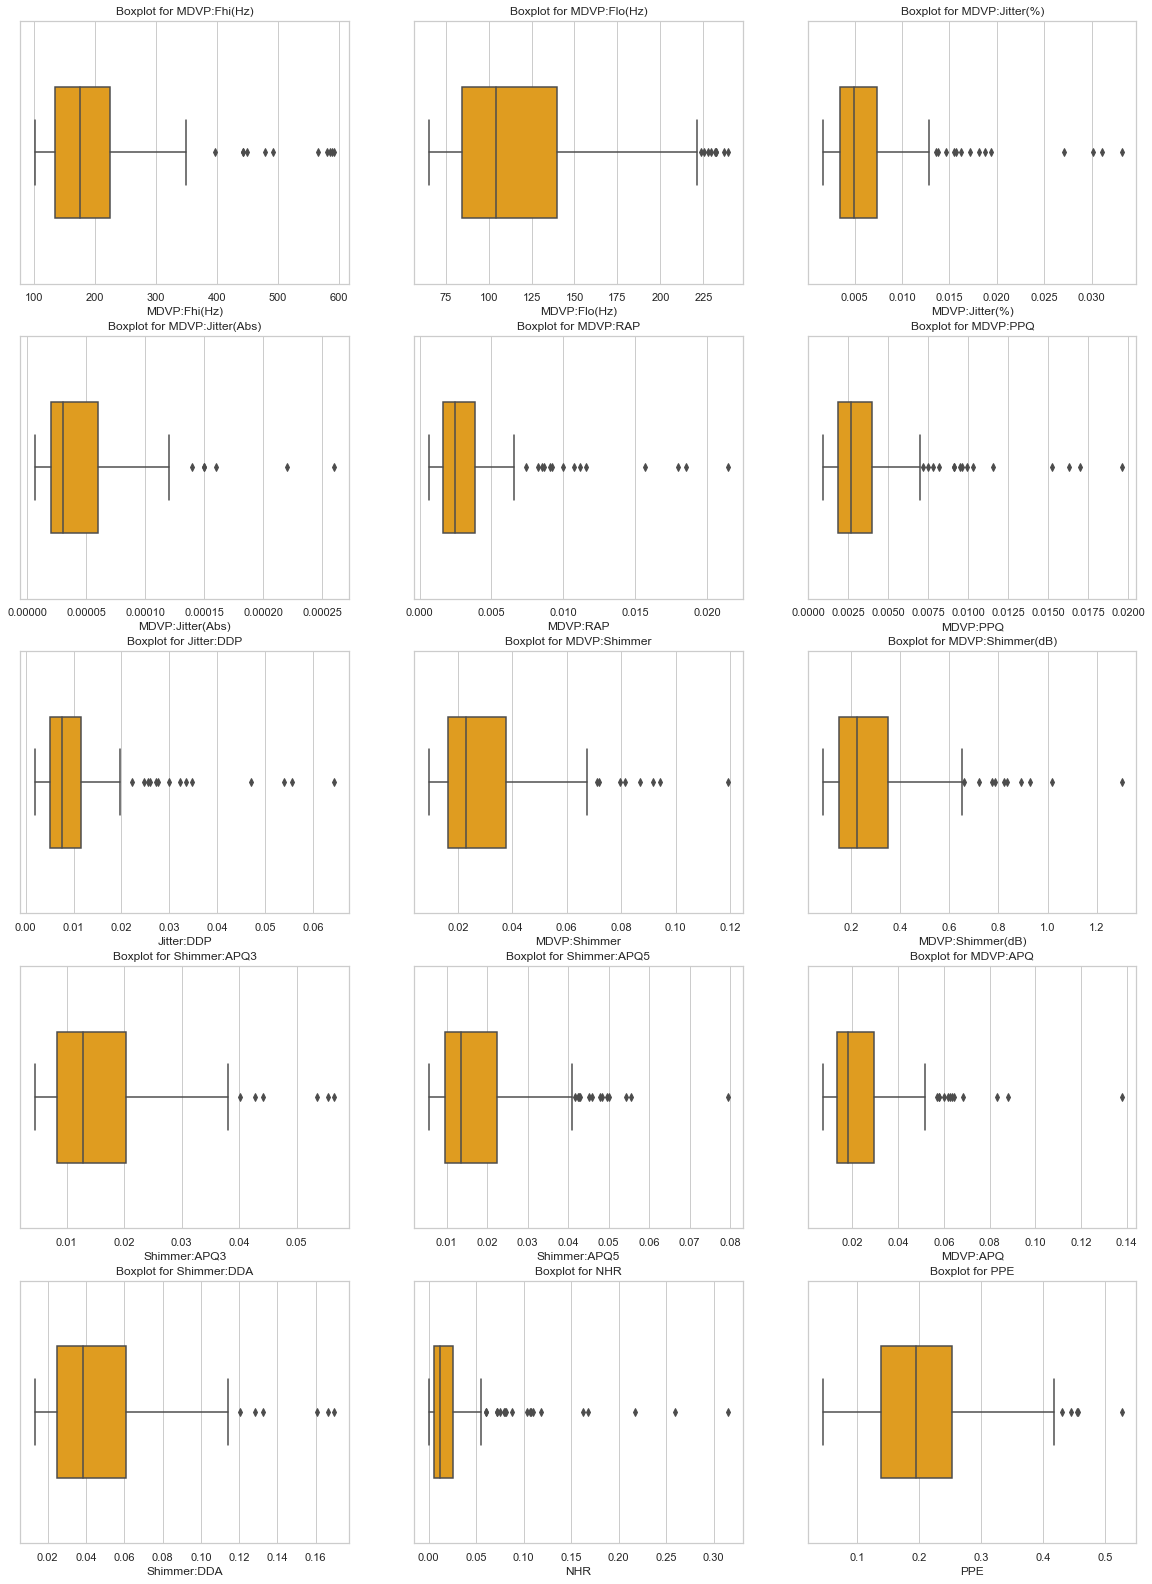

In [21]:
#Visualizing Outliers in dataset using boxplot for columns which have outlier data points in them.
#Ignoring columns D2 , spread2, HNR and spread1 columns as they have only 1,2,3 and 4 outliers.

print('\n\t\tboxplot to check the presence of outliers in numeric columns')
print('\t\t==============================================================\n')
numcols = ['MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ',
           'Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5',
           'MDVP:APQ','Shimmer:DDA','NHR','PPE']
fig, ax = plt.subplots(5,3, figsize=(20, 28))
for col,subplot in zip(numcols,ax.flatten()) :
    sns.boxplot(x=pd_df[[col]], width=0.5, color='orange', ax=subplot)
    subplot.set_title('Boxplot for {}'.format(col))
    subplot.set_xlabel(col)    
plt.show()


### Observations on outlier analysis of numerical columns:
1. Above are the boxplots are only for the numerical columns which have outliers in them.
2. All the outliers are above the maximum value in the respective columns.
3. MDVP:PPQ column has the maximum outlier count of 15.
4. MDVP:Jitter(%), MDVP:RAP, Jitter:DDP columns have the next maximum outlier count of 14.

# Univariate Analysis

## Visualizing Distribution of numerical columns through histograms

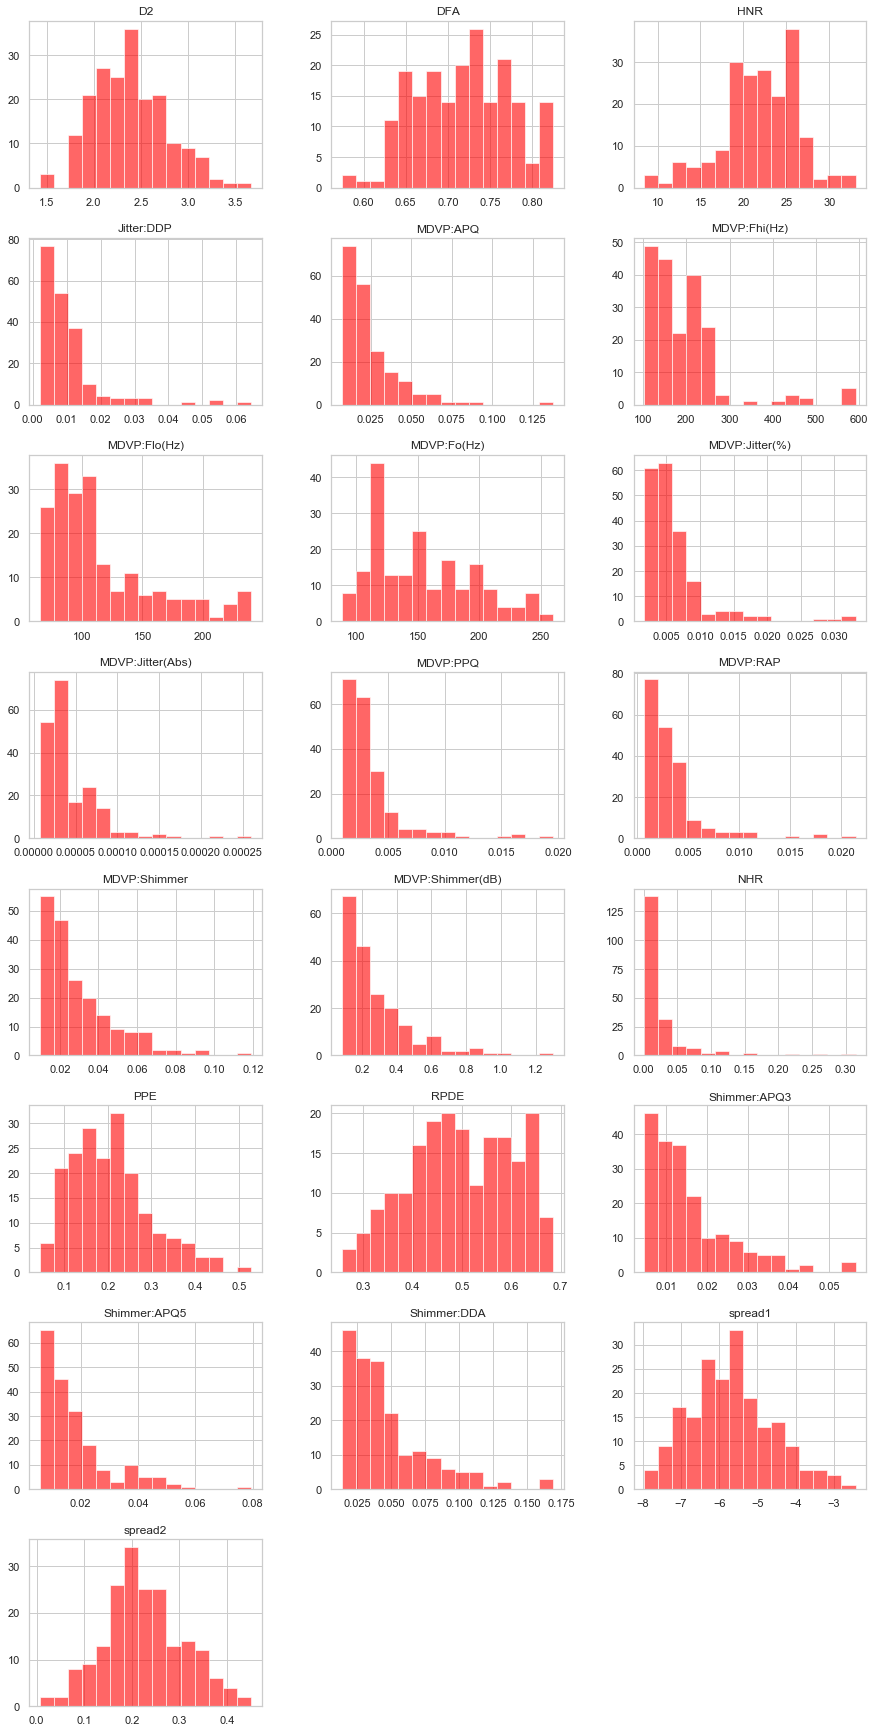

In [22]:
pd_df.drop(['status'],axis=1).hist(bins=15, figsize=(15,35), layout=(9,3),color = 'red',alpha=0.6)
plt.show()

### Observations on univariate analysis of numerical columns:
 1. The distributions for the columns Jitter:DDP, MDVP:APQ, MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, PPE, Shimmer:APQ3, Shimmer:APQ5, Shimmer:DDA, spread2 and D2 show that these are right skewed.
 2. The column spread1 shows an approximately normal disribution.
 3. The columns DFA, HNR, MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Fo(Hz) and RPDE do not follow a normal or uniform or a skewed disrribution.These didtributions are uneven.
 4. Most of the distributions (17 columns) are mostly right skewed.
 5. All the Shimmer and Jitter columns and most of MDVP columns are right skewed.

## Visualizing value counts of categorical columns through countplot

In [24]:
pd_df.groupby(by = 'status').count()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


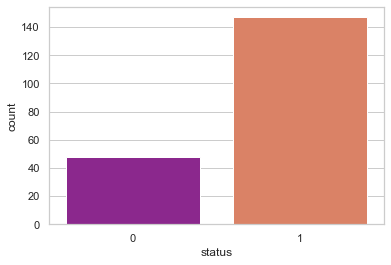

In [25]:
sns.countplot(pd_df['status'], palette = 'plasma')
plt.show()

### Observations on value counts of Target column:
1. A status of '0' refers to a 'Healthy person' and a status of '1' refers to a 'Person with Parkinson's disease'
2. The 48 records for status '0' correspond to 8 healthy persons.
3. The 147 records for status '1' correspond to 23 perons having 'Parkinson's Disease'.

# Bivariate Analysis

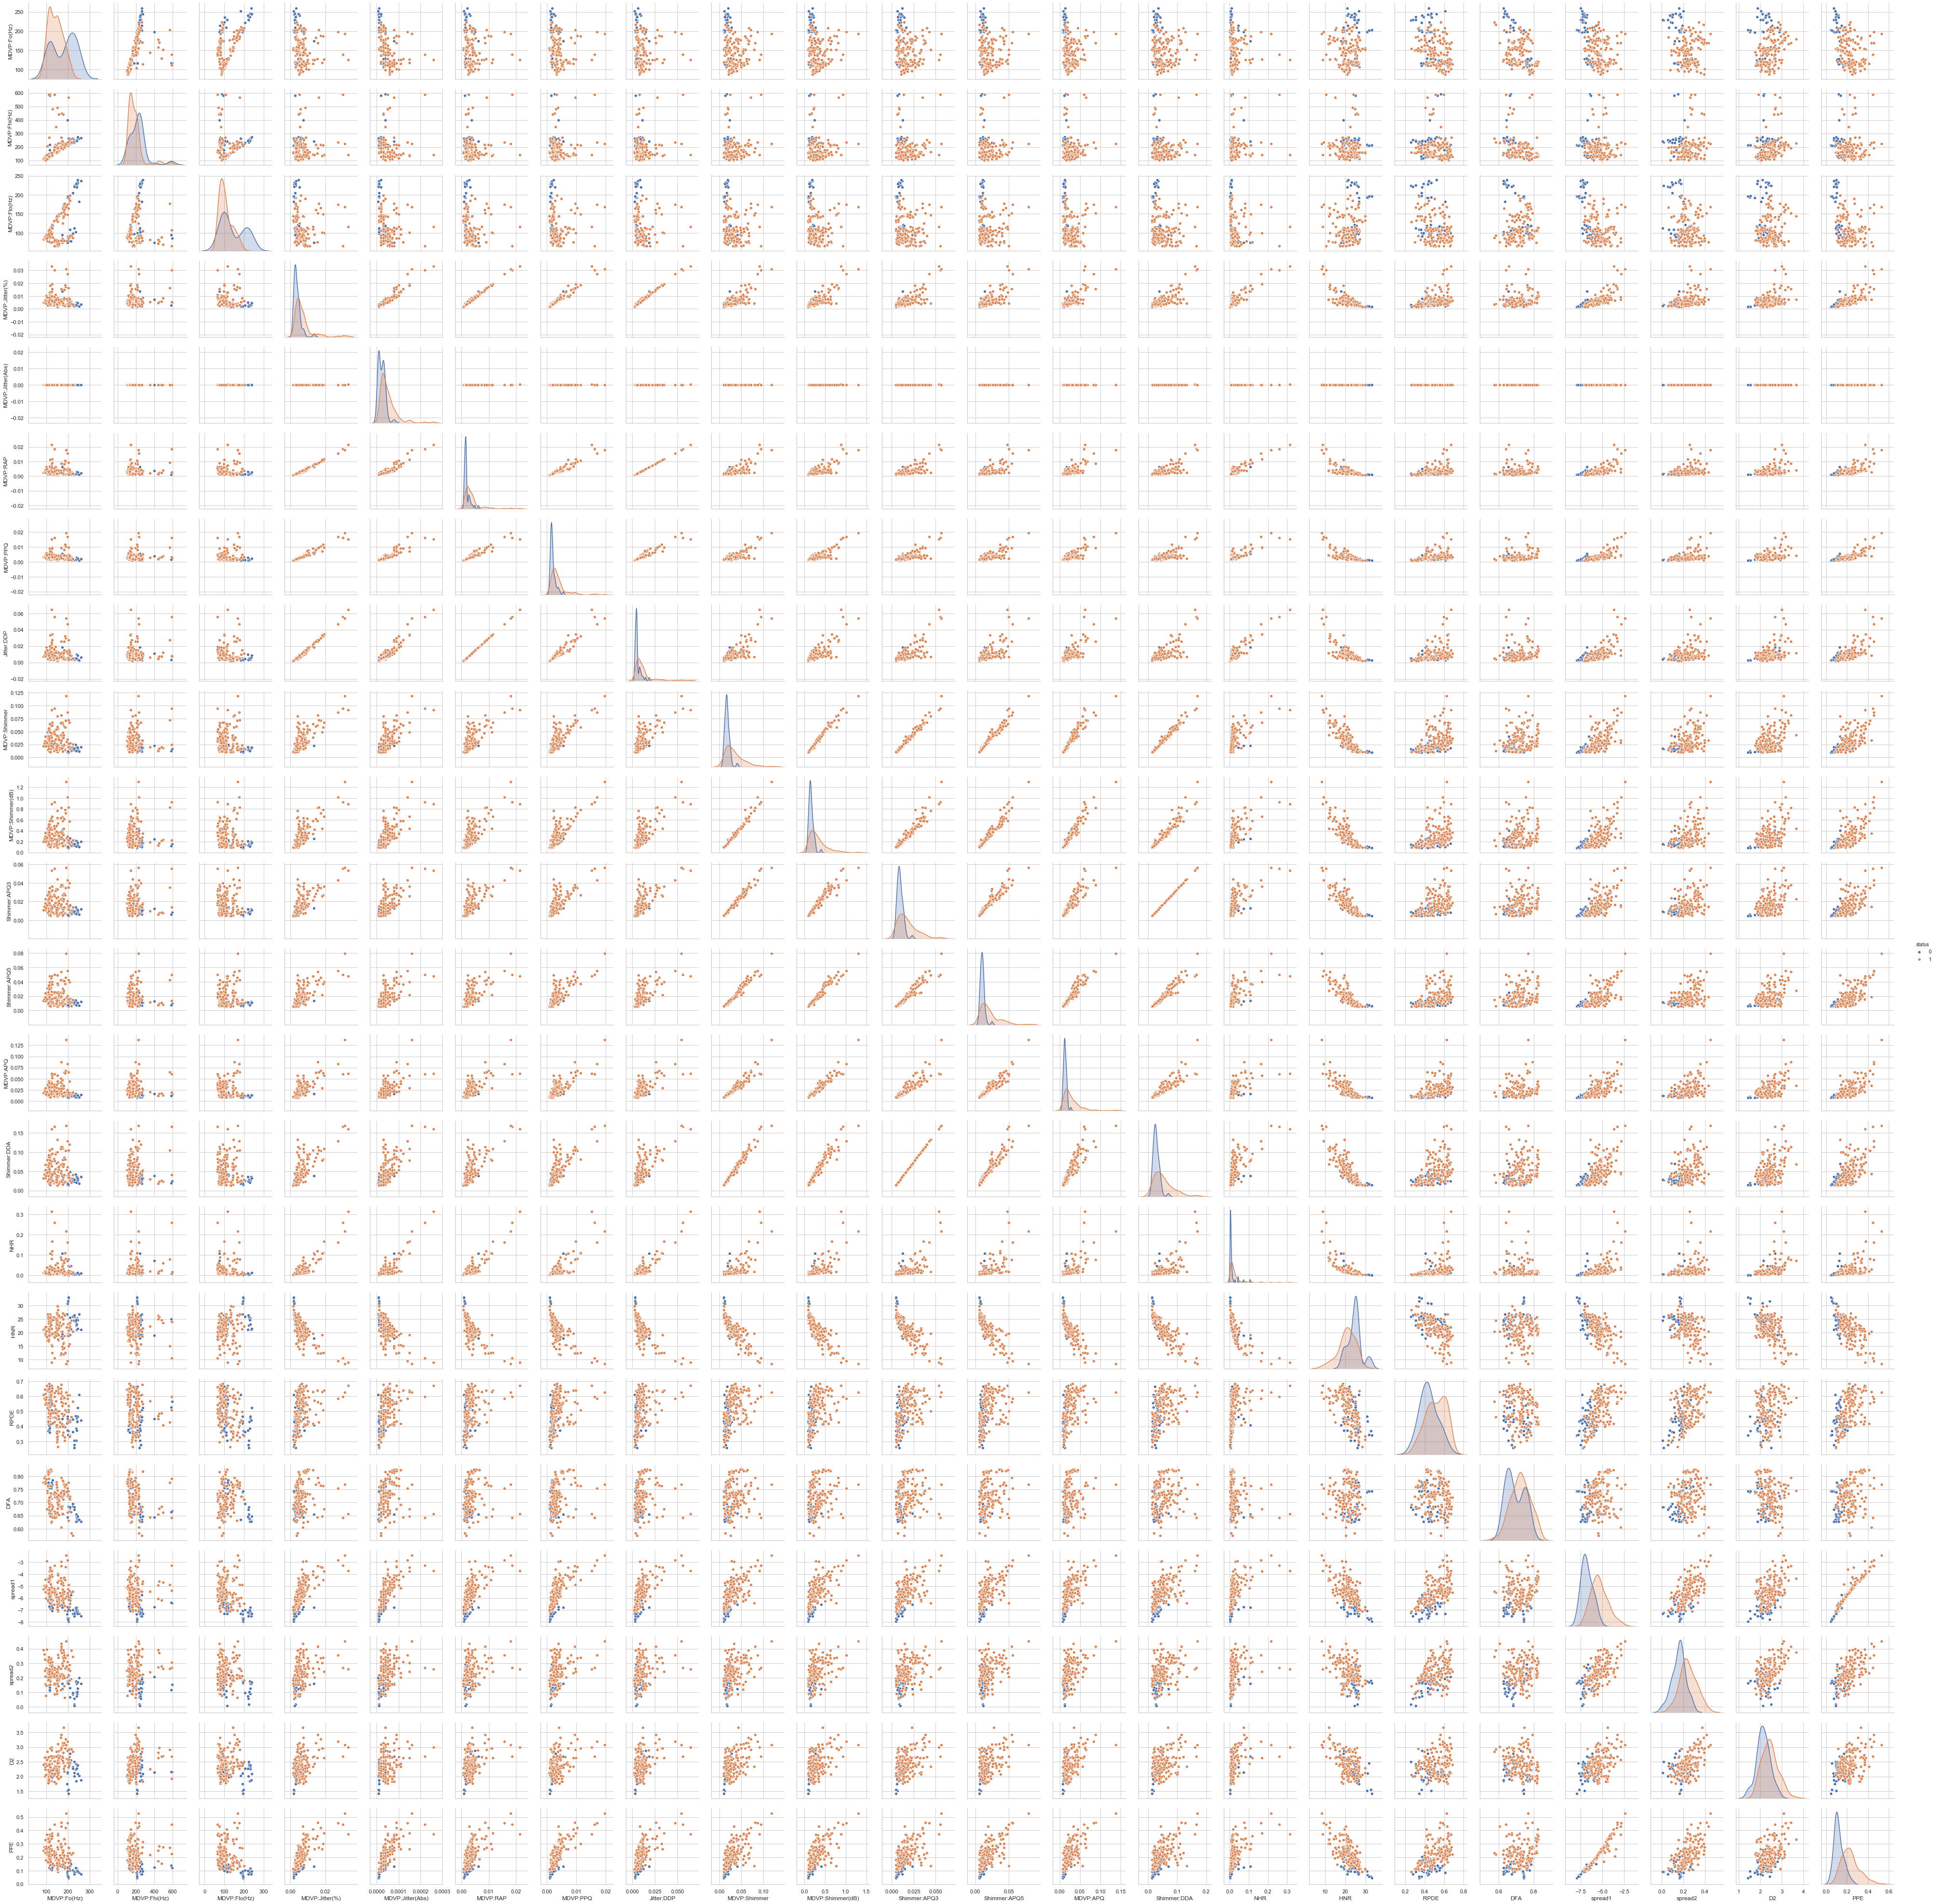

In [27]:
sns.pairplot(vars=pd_df.drop('status', axis=1).columns,hue='status',data=pd_df)
plt.show()

In [28]:
pd_df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### Observations on bivariate analysis using pairplot:
1. Kurtosis for status '1' - 'Parkinson's' is more than kurtosis for  status '0' - Healthy' for the columns MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), which are the Average< High and Low Fundamental frequency columns.
2. For all the remaining columns Kurtosis for status '0' (Healthy) is more than that for status '1'(Parkinson's)
3. KDE plots show that plots for status 0 and status 1 are ovelapping which means that the data is not easily classifiable.
4. The Average, Hi and Lo Vocal fundamental frequency columns show a linear relationship among them.
5. The plots for ('MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)), (MDVP:Fo(Hz), MDVP:Flo(Hz)), (MDVP:Fhi(Hz), MDVP:Flo(Hz)) show this linear relationship.
6. The columns for Jitter show a linear relationship among them.
7. The plots ('MDVP:Jitter(%)', 'MDVP:Jitter(Abs)'), ('MDVP:Jitter(%)','MDVP:RAP'), ('MDVP:Jitter(%)','MDVP:PPQ'), ('MDVP:Jitter(%)','Jitter:DDP') show this linear relationship.
8. The columns for Shimmer show a linear relationship among them.
9. The plots for ('MDVP:Shimmer', 'MDVP:Shimmer(dB)'), ('MDVP:Shimmer','Shimmer:APQ3'), ('MDVP:Shimmer','Shimmer:APQ5',) ('MDVP:Shimmer','MDVP:APQ'), ('MDVP:Shimmer','Shimmer:DDA') show this linear relationship.
10. DFA column has a linear relationship with the columns spread1, spread2, D2, PPE.
11. spread1 column has a good linear relationship with PPE column.
12. NHR, HNR and RPDE columns do not show good relationship with any columns.

## Correlation between numerical columns

In [29]:
#corr = pd_df.corr()
#Dropping satus column while finding the correlatipn as it is the target variable.
corr = pd_df.drop(['status'], axis=1).corr()
corr.style.background_gradient(cmap='YlGnBu')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1,0.400985,0.596546,-0.118003,-0.382027,-0.0761938,-0.112165,-0.0762127,-0.0983737,-0.0737425,-0.0947171,-0.0706818,-0.0777738,-0.0947316,-0.0219808,0.0591444,-0.383894,-0.446013,-0.413738,-0.24945,0.17798,-0.372356
MDVP:Fhi(Hz),0.400985,1,0.0849513,0.102086,-0.0291983,0.0971766,0.0911262,0.0971499,0.00228123,0.0434652,-0.00374325,-0.00999678,0.00493698,-0.00373289,0.163766,-0.0248931,-0.112404,-0.343097,-0.0766578,-0.00295361,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.0849513,1,-0.139919,-0.277815,-0.100519,-0.0958284,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.10867,0.210851,-0.400143,-0.0504063,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.360673,0.0985724,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.0291983,-0.277815,0.935714,1,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.69717,0.834972,-0.65681,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.0761938,0.0971766,-0.100519,0.990276,0.922911,1,0.957317,1,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.34214,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.0911262,-0.0958284,0.974256,0.897778,0.957317,1,0.957319,0.797826,0.839239,0.76358,0.78678,0.804139,0.763592,0.844604,-0.73151,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.0762127,0.0971499,-0.100488,0.990276,0.922913,1,0.957319,1,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.342079,0.0640264,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.0983737,0.00228123,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.0737425,0.0434652,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


### Observations:

## Visualizing Correlation between numerical columns through Heat map

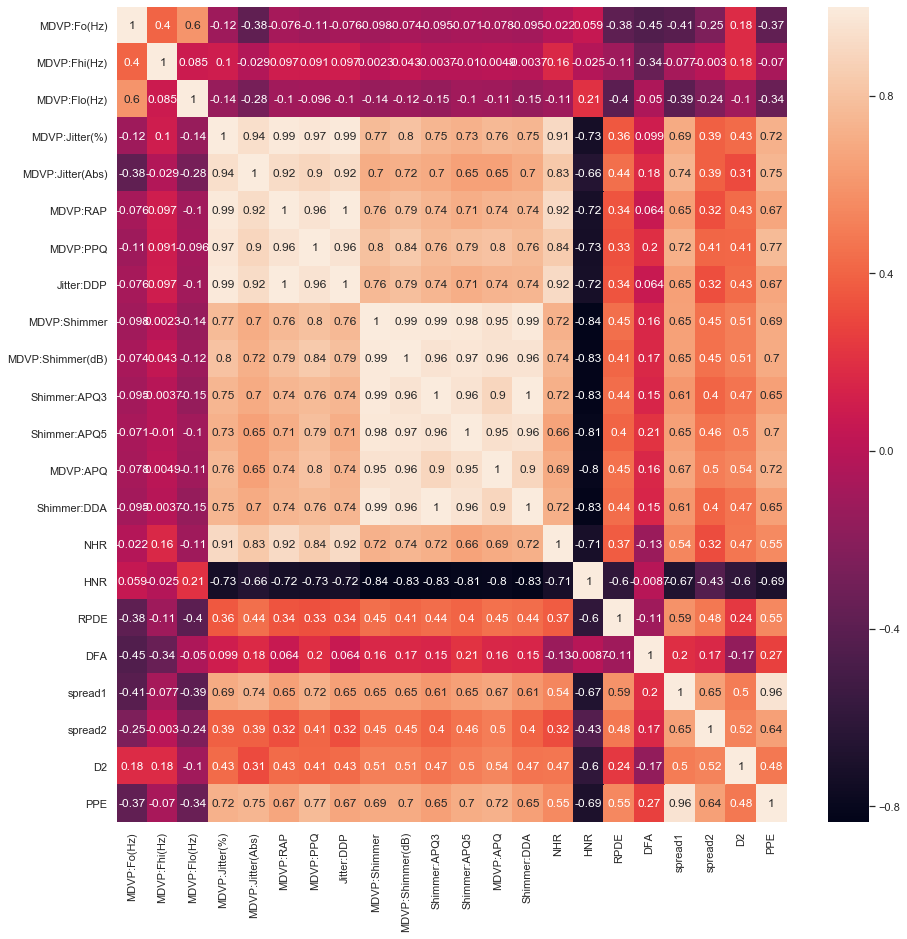

In [116]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr,ax=ax, annot=True)
plt.show()

### Observations on Correlation between numerical columns:
1. The columns related to to Jitter show a very strong relationship between them and have a high correlation with values 0.92, 0.94, 0.96, 0.97 and 0.99
2. The columns related to to Shimmer also show a very strong relationship between them and have a high correlation with values 0.9, 0.95, 0.96, 0.97, 0.98 and 0.99
3. The Average, Hi and Lo Vocal fundamental frequency columns do not show a strong correlation between them.Also,these columns show a weak correlation with other columns and show a negative correlation with some columns.
4. HNR column has a negative correlation with all other columns.
5. NHR column shows a good correlation with the Jitter related columns.
6. spread1 and PPE columns show stong correlation and  high correlation value of 0.96
7. The columns RPDE, DFA and D2 show a weak correlation with other columns.

## Variance in numerical columns

In [31]:
pd_df.var()

MDVP:Fo(Hz)         1.713137e+03
MDVP:Fhi(Hz)        8.370703e+03
MDVP:Flo(Hz)        1.894113e+03
MDVP:Jitter(%)      2.350440e-05
MDVP:Jitter(Abs)    1.212565e-09
MDVP:RAP            8.807685e-06
MDVP:PPQ            7.611952e-06
Jitter:DDP          7.926954e-05
MDVP:Shimmer        3.555839e-04
MDVP:Shimmer(dB)    3.797716e-02
Shimmer:APQ3        1.030867e-04
Shimmer:APQ5        1.445695e-04
MDVP:APQ            2.871919e-04
Shimmer:DDA         9.277580e-04
NHR                 1.633651e-03
HNR                 1.958739e+01
status              1.865186e-01
RPDE                1.080388e-02
DFA                 3.062054e-03
spread1             1.188553e+00
spread2             6.956521e-03
D2                  1.465351e-01
PPE                 8.121492e-03
dtype: float64

## Visualizing variance of numerical columns through lineplot

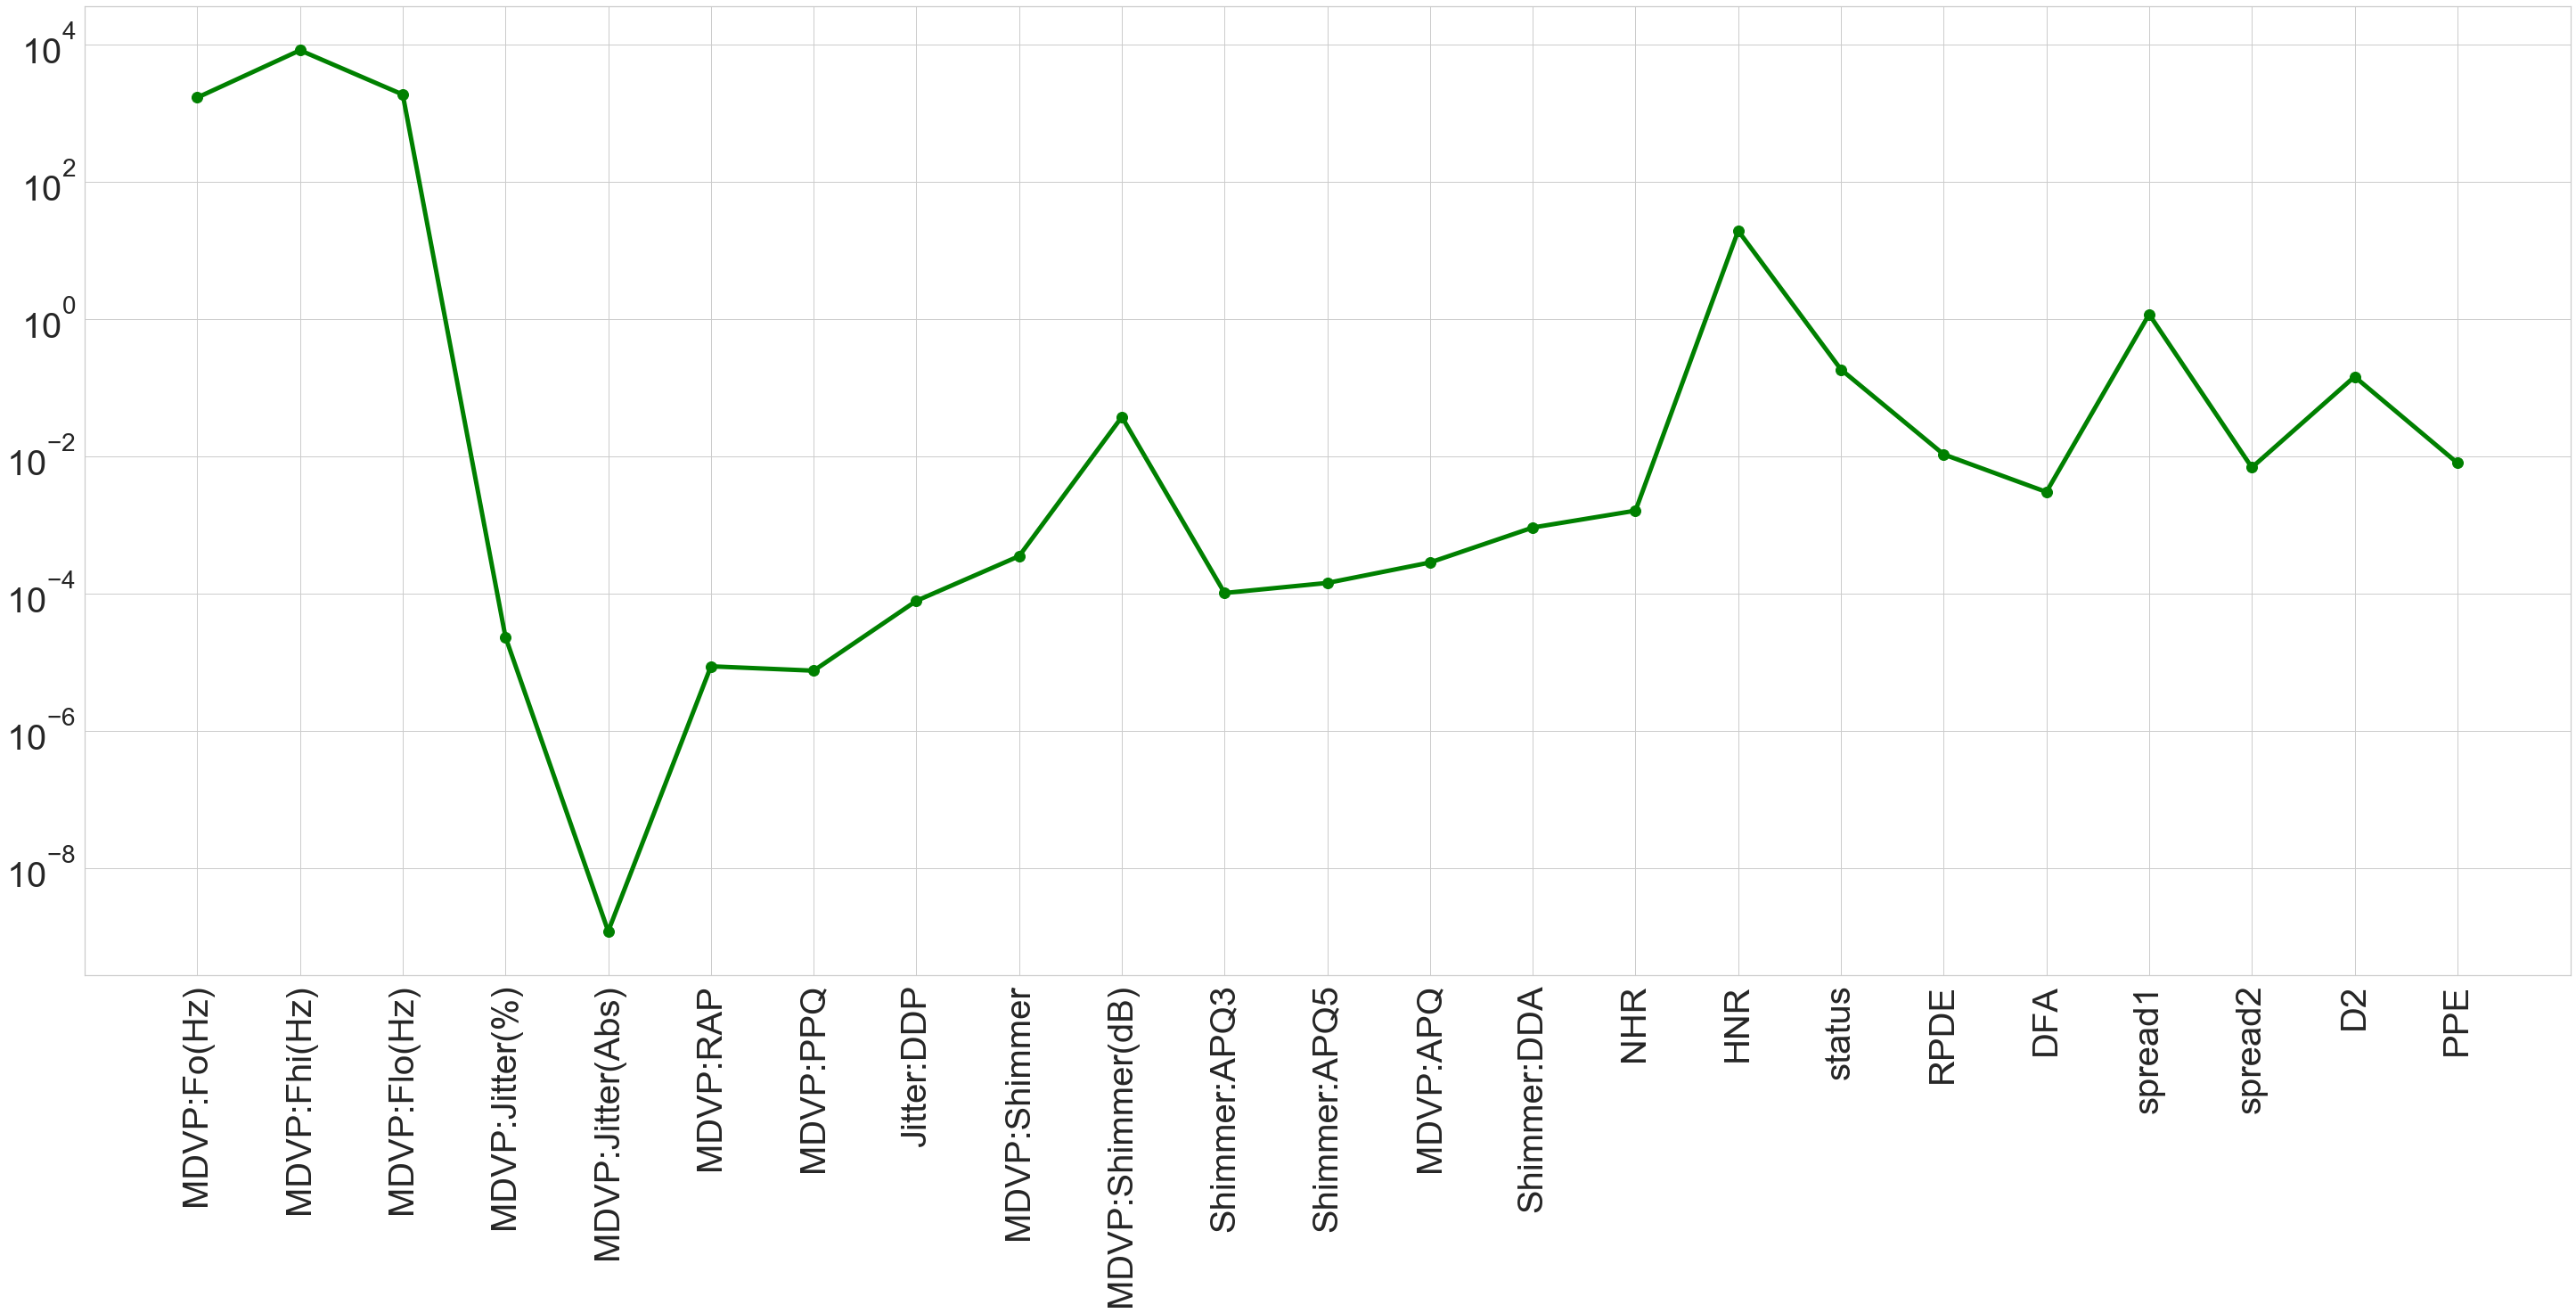

In [32]:
plt.figure(figsize=(50,20))
plt.xticks(rotation = 90, fontsize=40)
plt.yticks(fontsize=40)
plt.plot(pd_df.var(), color='green', marker='o',linewidth=5, markersize=12)
plt.yscale('log')
plt.show()

### Observations on variance of numerical columns
1. The above line plot shows the variance values for all the feature columns.
2. MDVP:Fhi(Hz) column has the highest variance of 8.370703e+03
3. MDVP:Jitter(Abs) column has the least variance of 1.212565e-09
4. A high variance indicates that the data points are more spread out around the mean, ie the spread is more and a low variance indicates that the data points are more close to the mean, ie the spread is less.
5. Most of the feature columns have a variance less than 1 and close to 0.
6. spread1 column has a variance close to 1, which indicates that it followas an approximately normal distribution.

# Implementing Decision Tree Classification model without regularization

### Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [33]:
X = pd_df.drop('status',axis=1)
y = pd_df['status']

In [34]:
print('Shape of Feture-set : ', X.shape)
print('Shape of Target-set : ', y.shape)

Shape of Feture-set :  (195, 22)
Shape of Target-set :  (195,)


### Split the data as train set and test set with a ratio of 70:30.

In [35]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.30, random_state=7)

In [36]:
print("Training Set Shape:\nFeatures : {0}  Target : {1}\n".format(X_train.shape, y_train.shape))
print("Test Set Shape:\nFeatures : {0}  Target : {1}".format(X_test.shape, y_test.shape))

Training Set Shape:
Features : (136, 22)  Target : (136,)

Test Set Shape:
Features : (59, 22)  Target : (59,)


### Build the Decision Tree model using Train Dataset and predict the class on test dataset.

In [37]:
#Implementing DecisionTree Classifier by reducing the impurities with entropy method 
#without any regularization prameters

dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=7)

In [38]:
#Fit the model to the training set

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

In [39]:
#Import Image from Ipython.display and tree from sklearn to visualize the decision Tree using graphviz

from IPython.display import Image  
from sklearn import tree

In [83]:
# We have to copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 

PD_Tree_File = open('pd_tree_ent.dot','w')
dot_data = tree.export_graphviz(dt_clf, out_file=PD_Tree_File, feature_names = X_train.columns, class_names = pd_df.columns)
PD_Tree_File.close()

#### Note : Please see the attached .dot file and .jpg file - pd_tree_ent.dot and pd_tree_ent.jpg

In [41]:
# Predict classes using the built model

yhat = dt_clf.predict(X_test)

In [84]:
# Model accuracy score using score() function on Training data set

dt_clf.score(X_train, y_train)

0.8970588235294118

In [85]:
# Model accuracy score using score() function on Test data set

dt_clf.score(X_test, y_test)

0.8983050847457628

In [93]:
# Cross tabulation on Actual test data and Predicted classes.This gives us the confusion matrix

pd.crosstab(index=y_test, columns=yhat, rownames=["Actuals"], colnames=["Predicted"])

Predicted,0,1
Actuals,,
0,9,3
1,4,43


## Model Performance

### Calculating Model Performance Metrics.

##### confusion matrix

In [47]:
confusion_matrix(y_test, yhat)

array([[ 9,  3],
       [ 4, 43]], dtype=int64)

##### accuracy-score

In [49]:
accuracy_score(y_test, yhat)

0.8813559322033898

##### Precision score

In [95]:
precision_score(y_test, yhat)

0.9347826086956522

###### Recall score

In [53]:
recall_score(y_test, yhat)

0.9148936170212766

###### F1-Score

In [98]:
f1_score(y_test, yhat)

0.924731182795699

##### Classification report

In [105]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.93      0.91      0.92        47

    accuracy                           0.88        59
   macro avg       0.81      0.83      0.82        59
weighted avg       0.89      0.88      0.88        59



# Implementing Decision Tree Classification model with regularization using regularizing parameters

#### Note : The regularizatiom parameters which are being used to recreate the DecisionTreeClassifier model are criterion='entropy'/'gini', max_depth, min_samples_leaf, min_samples_split.

In [56]:
#Recreate the Decisiontree classifier model with regularization parameters of 
#max_depth, min_samples_leaf, min_samples_split and using botth entropy and gini methods
#to reduce the impurities

criterion_arr = ['entropy', 'gini']
max_depth_arr = range(1,11)
min_samples_leaf_arr = range(1,11)
min_samples_split_arr = range(2,12)
dt_dict = {'impurity_measure':[], 'max_depth':[], 'min_samples_leaf':[], 'min_samples_split':[],
           'train set score':[], 'test set score':[],}
for c in criterion_arr:
    for d in max_depth_arr:
        for l in min_samples_leaf_arr :
            for s in min_samples_split_arr :
                dt_dict['impurity_measure'].append(c)
                dt_dict['max_depth'].append(d)
                dt_dict['min_samples_leaf'].append(l)
                dt_dict['min_samples_split'].append(s)
                dt_clf = DecisionTreeClassifier(criterion=c, max_depth=d, min_samples_leaf=l
                                                ,min_samples_split=s,random_state=7)
                dt_clf.fit(X_train, y_train)
                dt_dict['train set score'].append(dt_clf.score(X_train, y_train))
                dt_dict['test set score'].append(dt_clf.score(X_test, y_test))

In [57]:
#All the parameter values, impurity measure and the training and test scores are stored in a dict.
#Creating a Dataframe to store all the values and get the maximum accuracy score

dt_reg_df = pd.DataFrame(data = dt_dict, columns = dt_dict.keys())

In [58]:
# DataFrame with the regularization parameter values and scores

#dt_reg_df

In [59]:
#index of Maximum Training set score

idmax_train = dt_reg_df['train set score'].idxmax(axis=0)

In [108]:
# Parameter values for Maximum training score

print(dt_reg_df.iloc[idmax_train])

impurity_measure      entropy
max_depth                   3
min_samples_leaf            1
min_samples_split           2
train set score      0.941176
test set score       0.915254
Name: 200, dtype: object


In [61]:
#index of Maximum Test set score

idmax_test = dt_reg_df['test set score'].idxmax(axis=0)

In [62]:
# Parameter values for Maximum Test score

dt_reg_df.iloc[idmax_test]

impurity_measure      entropy
max_depth                   3
min_samples_leaf            1
min_samples_split           2
train set score      0.941176
test set score       0.915254
Name: 200, dtype: object

### Observations:
1. Without using any regularization parameters the accuracy score on training data and accuracy score on test data  were almost the same with 0.89.
2. Also the Precision score, Recall score and F1_score were showing good values of 0.93, 0.91 and 0.92
3. This shows that the model was a good fit model with a trade off between bias and variance without using any parameters for regularization.
4. When we rebuilt the model using a mix of different parameters - max_depth, min_samples_leaf and min_samples_split for two measures of impurity, entropy and gini index, we were able to get a better model performance.
5. We observe that the model performance is almost same with any of the impurity measures entropy and gini, but the best accuracy is being given by 'entropy' method.
6. For the parameter values, max_depth=3, min_samples_leaf=1, min_samples_split=2 and with the measure of impurity as 'entropy', there is an impact on the performance and accuracy score.
7. The model performance has increased and is the best with the accuracy score on training set as 0.94 and the accuracy score on test set as 0.91
8. The high accuracy values in both training and test sets and the low bias and variance errors can be justified as below.
    1. Most of the columns are correlated and show a linear relationship.
    2. The frequency related columns, the Jitter related columns and the Shimmer related columns have good linear relationship among them.
    3. The spread1 and spread2 columns show approximate normal distributions.
    4. With a sample of 195 records and 23 features, Decision tree classifier is learning well on the training dataset and giving a goodfit model.
 

###  How does regularization help in building a better model ?
- Decision trees do not build a relationship between the independent and dependent variables in the form of an equation like linear models do.
- Decision Tree is a non-parametrized algorithm and it does not take any input parameters. We have to supply only the hyperparameters for building the model.
- So, if a Decision tree is left unconstrained, they can build tree structures to adapt to the training data leading to overfitting.
- To avoid overfitting, we need to restrict the Decision tree’s freedom during the tree creation. This is called regularization.
- In decision trees regularization can be done by pruning the tree. 
- If a Descision tree is not pruned, it can continue to fit till each data point is a different leaf in the tree.
- This will not generalize well and so we need to put in different criteria to stop the tree from growing.
- The regularization hyperparameters help to reduce overfitting and give a Decision tree with a goodfit.

# Implementing Random Forest Classification model without regularization

### Build the Decision Tree model using Train Dataset and predict the class on test dataset.

In [88]:
#Implementing RandomForest Classifier by reducing the impurities with entropy method 
#without any regularization prameters

rf_clf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=7)

In [89]:
#Fit the model to the training set

rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [90]:
# Predict classes using the built model

yhat_rfclf = rf_clf.predict(X_test)

In [91]:
# Model accuracy score using score() function on Training data set

rf_clf.score(X_train, y_train)

0.9926470588235294

In [92]:
# Model accuracy score using score() function on Test data set

rf_clf.score(X_test, y_test)

0.9152542372881356

In [82]:
# Cross tabulation on Actual test data and Predicted classes.This gives us the confusion matrix

pd.crosstab(index=y_test, columns=yhat_rfclf, rownames=["Actuals"], colnames=["Predicted"])

Predicted,0,1
Actuals,,
0,9,3
1,2,45


## Model Performance

### Calculating Model Performance Metrics.

##### confusion matrix

In [99]:
confusion_matrix(y_test, yhat_rfclf)

array([[ 9,  3],
       [ 2, 45]], dtype=int64)

##### accuracy-score

In [68]:
accuracy_score(y_test, yhat_rfclf)

0.9152542372881356

##### Precision score

In [69]:
precision_score(y_test, yhat_rfclf)

0.9375

###### Recall score

In [70]:
recall_score(y_test, yhat_rfclf)

0.9574468085106383

###### F1-Score

In [71]:
f1_score(y_test, yhat_rfclf)

0.9473684210526315

##### Classification report

In [107]:
print(classification_report(y_test, yhat_rfclf))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.94      0.96      0.95        47

    accuracy                           0.92        59
   macro avg       0.88      0.85      0.86        59
weighted avg       0.91      0.92      0.91        59



# Implementing Random Forest Classification model with regularization using regularizing parameters

#### Note : The regularizatiom parameters which are being used to recreate the RandomForestClassifier model are criterion='entropy'/'gini', max_depth, min_samples_leaf, min_samples_split and n_estimators.

In [72]:
#Recreate the RandomForest classifier model with regularization parameters of 
#max_depth, min_samples_leaf, min_samples_split, n_estimators and using both entropy and gini methods
#to reduce the impurities

criterion_arr = ['entropy', 'gini']
max_depth_arr = range(1,11)
min_samples_leaf_arr = range(1,11)
min_samples_split_arr = range(2,12)
n_estimators_arr=range(10,51)
rt_dict_reg = {'impurity_measure':[], 'max_depth':[], 'min_samples_leaf':[], 'min_samples_split':[], 'n_estimators':[],
           'train set score':[], 'test set score':[]}
for c in criterion_arr :
    for d in max_depth_arr :
        for l in min_samples_leaf_arr :
            for s in min_samples_split_arr :
                for ne in n_estimators_arr :
                    rt_dict_reg['impurity_measure'].append(c)
                    rt_dict_reg['max_depth'].append(d)
                    rt_dict_reg['min_samples_leaf'].append(l)
                    rt_dict_reg['min_samples_split'].append(s)
                    rt_dict_reg['n_estimators'].append(ne)
                    rt_clf_reg = RandomForestClassifier(criterion=c, max_depth=d, min_samples_leaf=l,min_samples_split=s, n_estimators=ne, random_state=7)
                    rt_clf_reg.fit(X_train, y_train)
                    rt_dict_reg['train set score'].append(rt_clf_reg.score(X_train, y_train))
                    rt_dict_reg['test set score'].append(rt_clf_reg.score(X_test, y_test))

In [73]:
#All the parameter values, impurity measure and the training and test scores are stored in a dict.
#Creating a Dataframe to store all the values and get the maximum accuracy score

rt_reg_df = pd.DataFrame(data = rt_dict_reg, columns = rt_dict_reg.keys())

In [109]:
# DataFrame with the regularization parameter values and scores

#rt_reg_df

In [110]:
#index of Maximum Training set score

idmax_train_rf = rt_reg_df['train set score'].idxmax(axis=0)

In [111]:
# Parameter values for Maximum training score

rt_reg_df.iloc[idmax_train_rf]

impurity_measure      entropy
max_depth                   5
min_samples_leaf            1
min_samples_split           2
n_estimators               28
train set score             1
test set score       0.881356
Name: 16418, dtype: object

In [112]:
#index of Maximum Test set score

idmax_test_rf = rt_reg_df['test set score'].idxmax(axis=0)

In [79]:
# Parameter values for Maximum Test score

rt_reg_df.iloc[idmax_test_rf]

impurity_measure         gini
max_depth                   6
min_samples_leaf            3
min_samples_split           2
n_estimators               20
train set score      0.985294
test set score       0.932203
Name: 62330, dtype: object

### Observations:
1. Without using any regularization parameters the accuracy score on training set was 0.99 and the accuracy score on test set was 0.91
2. Also the Precision score, Recall score and F1_score were showing good values of 0.91, 0.93 and 0.95
3. This shows that the model was a good fit model with a trade off between bias and variance without using any parameters for regularization.
4. When we rebuilt the model using a mix of different parameters - max_depth, min_samples_leaf, min_samples_split and n_estimators for two measures of impurity, entropy and gini index, we were able to get a better model performance.
5. For the parameter values, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=20 and with the measure of impurity as 'gini', there is an impact on the performance and accuracy score.
6. The model performance has increased and is the best with the accuracy score on training set as 0.98 and the accuracy score on test set as 0.93
7. The model performance is better than with a Decision tree classifier.
8. The high accuracy values in both training and test sets and the low bias and variance errors can be justified as below.
    1. Most of the columns are correlated and show a linear relationship.
    2. The frequency related columns, the Jitter related columns and the Shimmer related columns have good linear relationship among them.
    3. The spread1 and spread2 columns show approximate normal distributions.
    4. With a sample of 195 records and 23 features,the sampling with or without bootstrapping will result in samples with nearly the same statics(mean, median) and spread (variance)
    5. The Decision tree classifier was also learning well on the training dataset and giving a goodfit model.
    6. The small sample size of 195 records is not as good datset for 23 features to get sam ples which have more variance and randomness.
9. We can conclude that RandomForest Classifier will learn well and give a goodfit model because size of the dataset(number of records) is less.
 